In [1]:
import pyspark as ps
import numpy as np
import pandas as pd
import random

In [0]:
spark = ps.sql.SparkSession.builder \
    .master('local[4]') \
    .appName('spark-homework') \
    .getOrCreate()
    
sc = spark.sparkContext

In [0]:
rdd = sc.parallelize(xrange(100))

rdd_d1 = rdd.map(lambda _:random.randrange(1, 7, 1))
dice1 = np.array(rdd_d1.collect())

rdd_d2 = rdd.map(lambda _:random.randrange(1, 7, 1))
dice2 = np.array(rdd_d2.collect())

outcome = dice1+dice2

In [0]:
filtered_outcome = np.array(np.unique(outcome, return_counts=True)).T
values = filtered_outcome[:,0]
frequency = filtered_outcome[:,1]
data = {'Sum of the two dice': values, 'Number of occurrences': frequency}
df = pd.DataFrame(data=data)
df

,Sum of the two dice,Number of occurrences
0,3,3
1,4,1
2,8,2
3,9,1
4,10,1


In [0]:
df.plot(kind='hist',
        alpha=0.7,
        bins = 20,
        legend =False,
        title='Sum of the two dice',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#A0E8AF'])

<AxesSubplot:title={'center':'Sum of the two dice'}, ylabel='Frequency'>

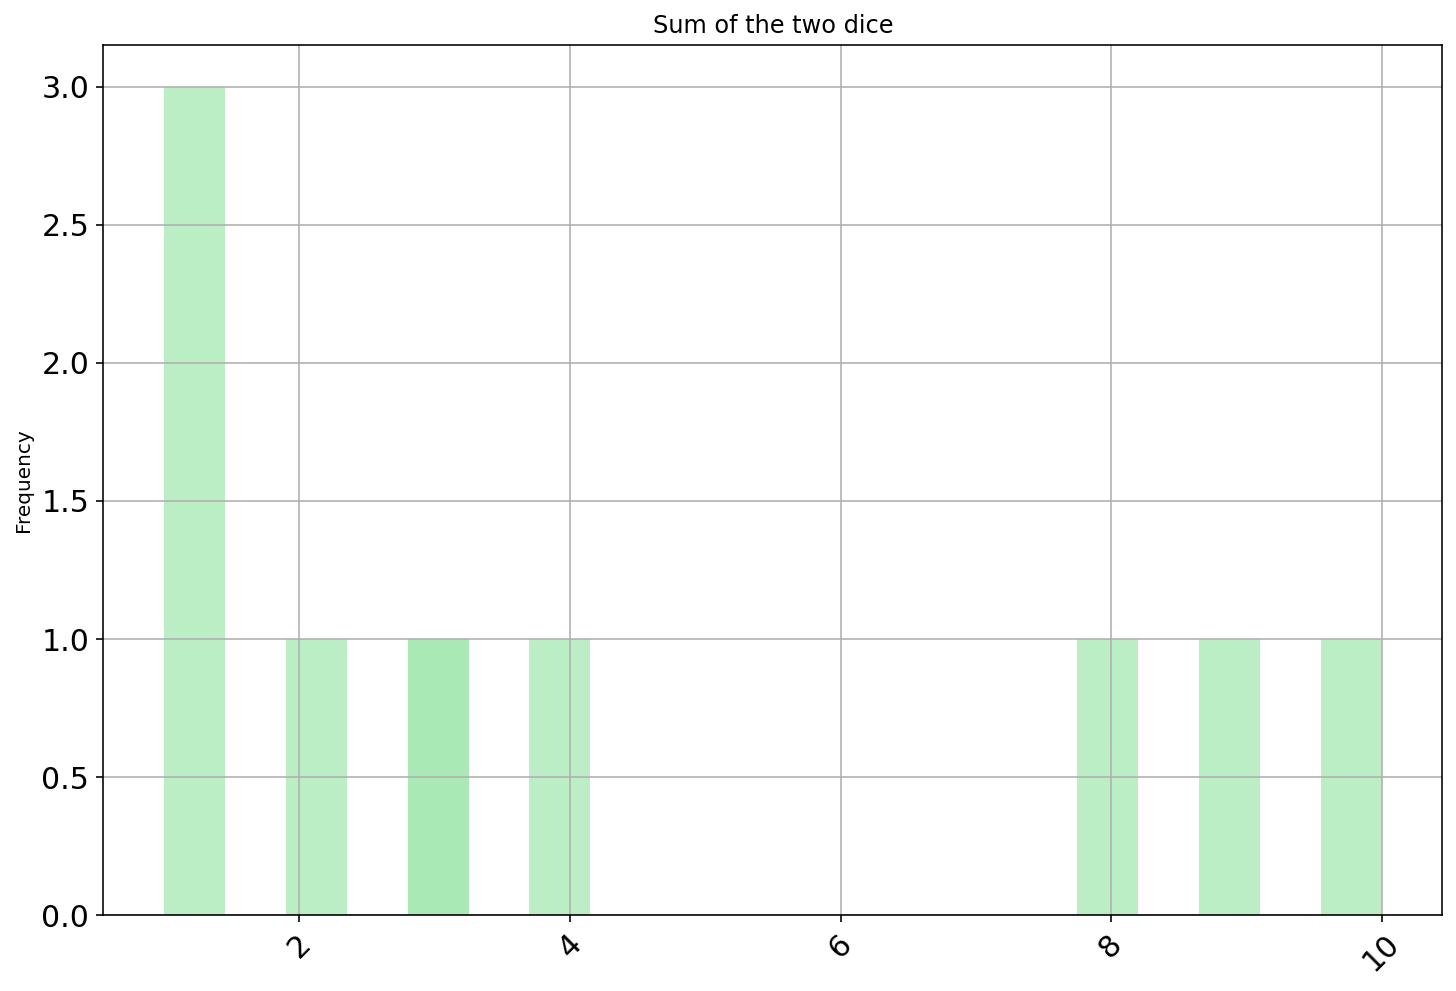